In [7]:
import pandas as pd
import openpyxl
dataset01 = pd.read_csv('./dataset/kc_data_1.csv')
dataset02 = pd.read_csv('./dataset/kc_data_2.csv')
dataset = pd.concat([dataset01, dataset02])
# 서울만 분리해냄
dataset = dataset[dataset['시도명']=='서울']

guide_date = dataset['기준년월'].unique()
print(guide_date)
dataset_2018 = dataset[dataset['기준년월'] == guide_date[0]]
dataset_2019 = dataset[dataset['기준년월'] == guide_date[1]]
dataset_2020 = dataset[dataset['기준년월'] == guide_date[2]]
dataset = dataset[dataset['기준년월'] == guide_date[0]]

['2018-12' '2019-12' '2020-12']


In [8]:
# 서울시 시군구명 추출
# 결과 : 25개 모두 존재
sigoongu = list(set(dataset['시군구명']))
print(len(sigoongu), '개')
# print(sigoongu)

25 개


In [9]:
# 각 시군구별 업종중분류명 추출
middle = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    middle.extend(temp)
    # print(gu,": ", len(temp),": ", temp)

In [10]:
# 각 시군구별 업종대분류명 추출
big = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    big.extend(temp)
    # print(gu,": ", temp)

In [11]:
# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [16]:
# 시군구별 - 업종대분류 - 매출평균액
gu_big_maechul = {}
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    b_mean = []
    for b in big:
        temp_b = temp[temp['업종대분류명']==b]
        temp_b = temp_b.fillna(0)
        b_mean.append(temp_b['매출평균액'].mean())
    gu_big_maechul[gu] = b_mean
# print(gu_big_maechul)

{'서초구': [161642.0, 76571861.39123751, 20360146.770045385, nan, 436324.55555555556, 7596471.474622771, 44897018.6, 2530914.92972973, 3914589.4393939395, 31519024.204545453, 4630120.702179177, 97311318.88544892, 11117629.377777778, 2249403.606060606, 4051105.4377880185, 9531802.100806452, 11138632.852941176, 1014704.5422343324, 1248407.1333333333, 3093115.822222222, 613909.5360824743], '강동구': [0.0, 6427904.86744186, 12592155.771653544, nan, 235655.1739130435, 2217086.3285714285, 0.0, 713846.7073170731, 2686668.052631579, 97502785.77902621, 3869637.861111111, 5972809.2105263155, 2056395.2732558139, 2448838.31441048, 611854.7608695652, 2596889.4266666668, 350787.23333333334, 376860.6153846154, 474240.4285714286, 172204.0, 846711.3555555556], '강북구': [nan, 1265317.947089947, 1388431.4314720812, nan, 2785746.1818181816, 716078.6666666666, 0.0, 158318.08, 251.28571428571428, 1333374.3053435115, 307844.0987654321, 254332.18, 298174.31707317074, 141849.36633663366, 16867.7, 4403226.7894736845, 0

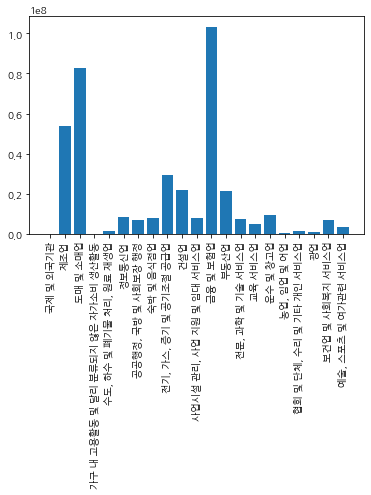

In [21]:
plt.bar(big, gu_big_maechul['강남구'])
plt.xticks(rotation=90)
plt.show()

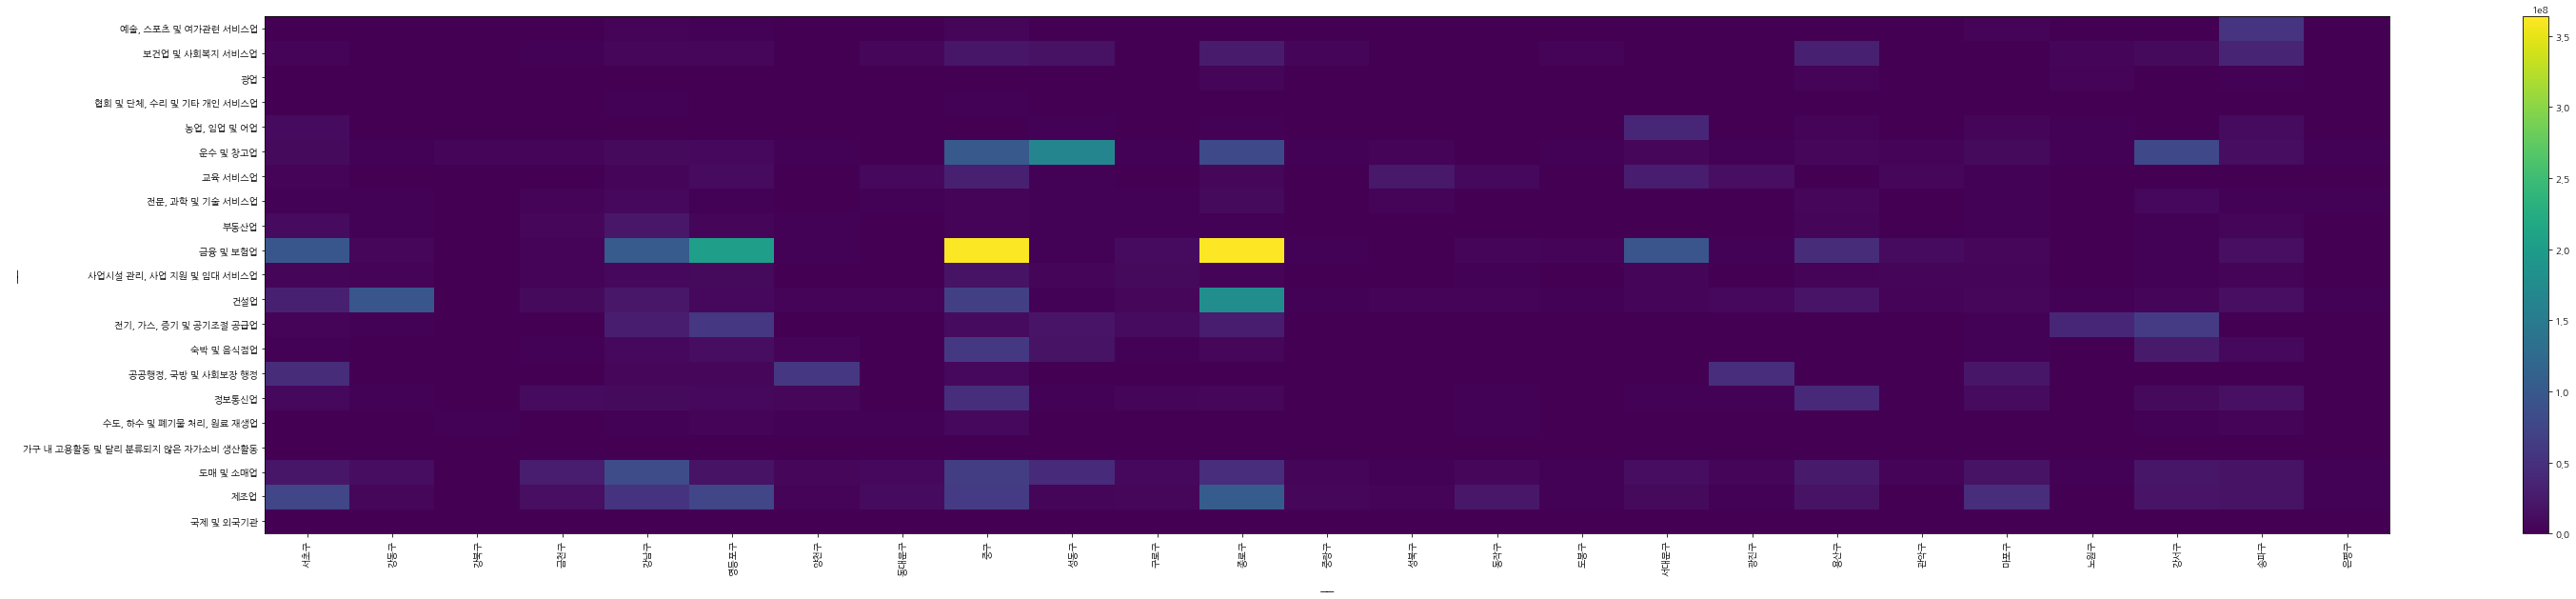

In [27]:
gu_big_maechul_pd = pd.DataFrame(gu_big_maechul, index=big, columns=sigoongu)
gu_big_maechul_pd = gu_big_maechul_pd.fillna(0)
plt.figure(figsize=(50,10))
plt.pcolor(gu_big_maechul_pd)
plt.xticks(np.arange(0.5, len(gu_big_maechul_pd.columns), 1), gu_big_maechul_pd.columns, rotation=90)
plt.yticks(np.arange(0.5, len(gu_big_maechul_pd.index), 1), gu_big_maechul_pd.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()